# Data Load

In [1]:
import numpy as np
import pandas as pd

In [ ]:
path = "./Dataset/"

data = pd.read_csv(path+"kwproja_data.csv")
data

# EDA

153395 rows X 31 columns

- 매장 속성 정보
  - shop_code -> 식별자 feature, input feature로는 사용하지 않지만 분류를 위해서는 사용할 수 있을 것 같음  
  - shop_name -> input feature로는 사용하지 않음 (NLP deep learning 가능성 있음)
  - longtitude : 경도, latitude : 위도 -> 매장 위치 (회사 근처, 학교 근처 등 매출 영향성 있음)
  - shop_type_big -> 14 category  -> 업종 (매출 영향성 있음)
  - shop_type_small -> 367 category

- 매출 정보
  - date -> 12 category, 201702~ 201801 까지의 data
  - monthly_gain / avearge_sale_price = 한달 총 판매수

- 매출 통계 정보
  - weekday0~6 : 일 ~ 월
  - time -> 05_10 / 10_14 / 14_18 / 18_20 / 20_22 / 22_24 / 24_05 => 시간대가 동일하지 않음
    - 새벽대는 찾는 손님 적어 시간 길게 잡았을 것
    - 저녁 시간대는 가장 매출이 많이 이뤄지는 prime time 이라 시간대를 짧게 잡았을 것
  - female/male : 20/30/40/50 -> 8 columns



##### monthly_gain과 average_sale_price 중 어느 것을 y값으로 둘 것인가? : y_label 비교해보아야 할 것 같음 
- 월매출 예측 문제로 가정하고 montly_gain 을 y값으로 예측하는 모델 만들기

##### shop_code와 관련해서 input feature에 분류해서 넣어야 하는가? 상관없는가? 
- 특별한 브랜드가 y값을 결정하는 과적합 요소가 될 수 있으므로
- X 에서 shop code, shop name 제외하는 것도 방법
- 어느 위치에 어떤 업종으로 어떤 객단가인 매장을 오픈하면 월매출이 어떻게 될까? 문제
 - X: shop type big, shop type small, longitude, latitude, avg_sale_price, 
 - y: montly_gain

In [ ]:
data.head()

In [4]:
data.columns

Index(['date', 'shop_code', 'shop_name', 'shop_type_big', 'shop_type_small',
       'longitude', 'latitude', 'monthly_gain', 'average_sale_price',
       'female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50', 'weekday0', 'weekday1', 'weekday2',
       'weekday3', 'weekday4', 'weekday5', 'weekday6', 'time_05_10',
       'time_10_14', 'time_14_18', 'time_18_20', 'time_20_22', 'time_22_24',
       'time_00_05'],
      dtype='object')

In [5]:
data.dtypes

date                    int64
shop_code               int64
shop_name              object
shop_type_big          object
shop_type_small        object
longitude             float64
latitude              float64
monthly_gain          float64
average_sale_price      int64
female_20             float64
female_30             float64
female_40             float64
female_50             float64
male_20               float64
male_30               float64
male_40               float64
male_50               float64
weekday0              float64
weekday1              float64
weekday2              float64
weekday3              float64
weekday4              float64
weekday5              float64
weekday6              float64
time_05_10            float64
time_10_14            float64
time_14_18            float64
time_18_20            float64
time_20_22            float64
time_22_24            float64
time_00_05            float64
dtype: object

In [6]:
# 13633 
# 13352
# shop_name과 shop_code가 항상 같다면, 위 두 숫자가 같아야 하는데 약 300개의 data가 차이가 남 
# shop_code는 동일하지만(가게는 동일하지만) 업종, 가게명이 바뀌었을 수도 있음 -> shop_code를 식별자 feature로 사용
print(data['shop_name'].nunique())
print(data['shop_code'].nunique())
print(data['longitude'].nunique())
print(data['latitude'].nunique())
print(data['shop_type_big'].nunique())
print(data['shop_type_small'].nunique())
print(data['date'].unique())

13633
13352
3845
3845
14
367
[201703 201702 201705 201704 201707 201706 201709 201708 201711 201710
 201712 201801]


In [32]:
# shop code 를 group by 했을 때 그 안에 몇 종류의 shop name이 있는지 (1이어야 정상)
check_df = data.groupby('shop_code')['shop_name'].nunique().to_frame('shop_name_unique').reset_index()
check_df

,shop_code,shop_name_unique
0,60200446,1
1,60510211,1
2,68700298,1
3,80210201,1
4,82690502,1
...,...,...
13347,99912790101,1
13348,99931830105,1
13349,99950230203,1
13350,99971000120,1


In [29]:
# shop code안에 여러 shop name 있는 경우
check_df2[check_df2['shop_name_unique'] > 1]

,shop_code,shop_name_unique
42,148500219,4
129,308700726,4
159,348700564,2
351,668500219,3
373,708600354,7
...,...,...
13119,96988110220,5
13123,97058190605,4
13129,97238180201,5
13282,99208740105,6


In [ ]:
# 롯데 월드 안에  놀이기구도 있지만, 편의점, 호텔 등 다는 업종 매출로 잡히는 것들도 있음!
# 결론-> shop code, shop name 은 모델입력으로 적합하지 않음
# 업종 별 매출 예측으로만 봐야 적당할 것으로 보임
data[data['shop_code'] == 148500219]

In [ ]:
# shop_code는 동일하지만 shop_name이 바뀌는 것을 확인
# 보통은 13(12)개의 data가 있는 반면 이렇게 name이 바뀌는 경우 row data 수가 36개까지 증가하는 것으로 보임
data[data['shop_code'] == 68608110104]

In [24]:
check_df[check_df['shop_code_cnt'] != check_df['shop_name_cnt']]

,shop_code,shop_code_cnt,shop_name_cnt


In [34]:
data['monthly_gain'].value_counts()

0.0           3605
501000.0        57
255500.0        54
507000.0        54
150300.0        48
              ... 
44088912.0       1
11022270.0       1
22044649.0       1
10752963.0       1
3424211.0        1
Name: monthly_gain, Length: 114882, dtype: int64

## Graph (EDA)

In [38]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
#font_path = "C:/Windows/Fonts/NGULIM.TTF"
#font = fm.FontProperties().get_name()
#rc('font', family=font)


In [39]:
def view_price_hist(label) : 
    plt.hist(data[label])
    plt.title('price hist')
    plt.show()

def view_price_graph(label) :
    plt.subplot(211)
    plt.plot(data[label])
    plt.show()

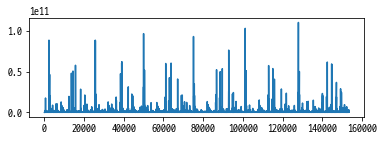

In [40]:
view_price_graph('monthly_gain')

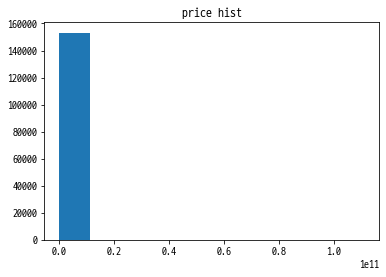

In [41]:
view_price_hist('monthly_gain')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

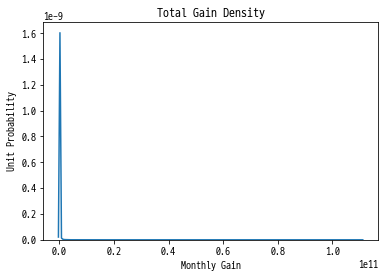

In [42]:
ax = plt.subplots()
ax = sns.distplot(data['monthly_gain'], hist=False)
ax.set_title('Total Gain Density')
ax.set_xlabel('Monthly Gain')
ax.set_ylabel('Unit Probability')

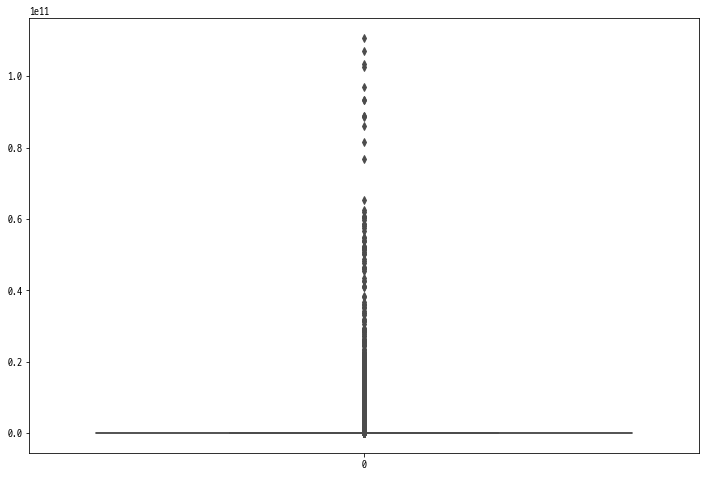

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data['monthly_gain'], color='red')
plt.show()

# Preprocessing
- shop_code, shop_name : 식별자 feature 이므로 drop 
- shop_type_big, shop_type_small : label encodding
- longitude, latitude : 일단은 input_feature에 넣지만 중복값이 많아 보이므로 추후에 제거해보려 함 
- monthly_gain : 결측치 제거 (0값, 3605개로 계산됨)
- MinMaxSaclar 정규화 -> 정규화 column의 범위는??
- date : drop, (그러나 RNN, LSTM과 같은 DL 모델에서는 넣어야 할지도..? 시계열 데이터이므로 쓸 수도 없을지도)


In [ ]:
# 원본 data와 따로 관리 -> original data = data, input data = input_data 
# feature drop
input_data = data.copy()

input_data = input_data.drop(['date', 'shop_code', 'shop_name'], axis=1)
input_data

In [ ]:
# # LabelEncoder
# from sklearn.preprocessing import LabelEncoder

# lencoder = LabelEncoder()

# item_big = input_data['shop_type_big'].unique()
# lencoder.fit(item_big)
# input_data['shop_type_big'] = lencoder.transform(input_data['shop_type_big'])

# item_small = input_data['shop_type_small'].unique() 
# lencoder.fit(item_small)
# input_data['shop_type_small'] = lencoder.transform(input_data['shop_type_small'])

# input_data

In [48]:
# # LabelEncoder
# from sklearn.preprocessing import LabelEncoder

# lencoder = LabelEncoder()

# item_big = input_data['shop_type_big'].unique()
# lencoder.fit(item_big)
# lencoder.classes_  #?

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

input_data['shop_type_big'] = le.fit_transform(list(input_data['shop_type_big']))   # fit transform으로 한번에 처리 가능
le.classes_

In [ ]:
le = LabelEncoder()

input_data['shop_type_small'] = le.fit_transform(list(input_data['shop_type_small'])) 
le.classes_

In [56]:
input_data['shop_type_big'].value_counts()

9     51202
6     49197
11    16774
5     16698
14     4739
0      4468
1      3706
3      2738
8      1614
7      1236
13      545
4       345
12      103
2        23
10        7
Name: shop_type_big, dtype: int64

In [ ]:
# 결측치 제거 
drop_index = input_data[input_data['monthly_gain']==0].index 
input_data = input_data.drop(drop_index)
input_data

In [ ]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = input_data.columns.tolist()
scaled_data = scaler.fit_transform(input_data[scale_cols])
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = scale_cols 

input_data = scaled_data
input_data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


0.000005    57
0.000002    54
0.000005    54
0.000001    48
0.000001    48
            ..
0.000115     1
0.000112     1
0.000247     1
0.000005     1
0.000501     1
Name: monthly_gain, Length: 114881, dtype: int64


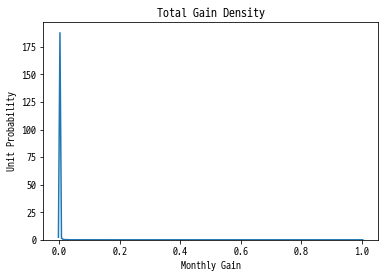

In [59]:
ax = plt.subplots()
ax = sns.distplot(input_data['monthly_gain'], hist=False)
ax.set_title('Total Gain Density')
ax.set_xlabel('Monthly Gain')
ax.set_ylabel('Unit Probability')
print(input_data['monthly_gain'].value_counts())

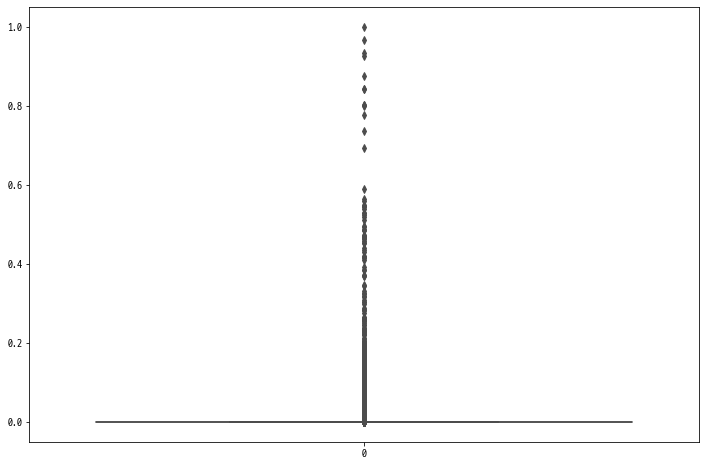

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(data=input_data['monthly_gain'], color='red')
plt.show()

# Data Split

In [61]:
input_data_y = input_data['monthly_gain'].copy()
input_data_X = input_data.drop(['monthly_gain'], axis=1)

In [62]:
from sklearn.model_selection import train_test_split

tr_val_X, test_X, tr_val_y, test_y = train_test_split(
    input_data_X, 
    input_data_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42)      

train_X, valid_X, train_y, valid_y = train_test_split(
    tr_val_X, 
    tr_val_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42)   

# Modeling
- XGB
- LGBM

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, TimeSeriesSplit,GridSearchCV
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from lightgbm import plot_importance 
from xgboost import XGBRegressor
from xgboost import plot_importance

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [65]:
model_xgb = XGBRegressor(n_estimators=500, learning_rate=0.05)

model_xgb.fit(train_X, train_y, early_stopping_rounds=100, eval_set=[(valid_X, valid_y)],verbose=True)  #logloss 는 classification 평가용
pred_xgb = model_xgb.predict(test_X)

[0]	validation_0-rmse:0.47439
[1]	validation_0-rmse:0.45069
[2]	validation_0-rmse:0.42818
[3]	validation_0-rmse:0.40679
[4]	validation_0-rmse:0.38647
[5]	validation_0-rmse:0.36717
[6]	validation_0-rmse:0.34884
[7]	validation_0-rmse:0.33142
[8]	validation_0-rmse:0.31488
[9]	validation_0-rmse:0.29916
[10]	validation_0-rmse:0.28424
[11]	validation_0-rmse:0.27004
[12]	validation_0-rmse:0.25657
[13]	validation_0-rmse:0.24376
[14]	validation_0-rmse:0.23159
[15]	validation_0-rmse:0.22002
[16]	validation_0-rmse:0.20905
[17]	validation_0-rmse:0.19861
[18]	validation_0-rmse:0.18870
[19]	validation_0-rmse:0.17928
[20]	validation_0-rmse:0.17033
[21]	validation_0-rmse:0.16183
[22]	validation_0-rmse:0.15376
[23]	validation_0-rmse:0.14609
[24]	validation_0-rmse:0.13880
[25]	validation_0-rmse:0.13188
[26]	validation_0-rmse:0.12530
[27]	validation_0-rmse:0.11905
[28]	validation_0-rmse:0.11311
[29]	validation_0-rmse:0.10747
[30]	validation_0-rmse:0.10212
[31]	validation_0-rmse:0.09703
[32]	validation_0-

In [66]:
model_lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.05)

model_lgbm.fit(train_X, train_y, early_stopping_rounds=100, eval_set=[(valid_X, valid_y)], verbose=True)  
pred_lgbm = model_lgbm.predict(test_X)

/usr/local/lib/python3.6/dist-packages/lightgbm/sklearn.py:734: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.6/dist-packages/lightgbm/sklearn.py:744: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.000174486
[2]	valid_0's l2: 0.00016784
[3]	valid_0's l2: 0.00016381
[4]	valid_0's l2: 0.000158032
[5]	valid_0's l2: 0.000152902
[6]	valid_0's l2: 0.000147442
[7]	valid_0's l2: 0.000142095
[8]	valid_0's l2: 0.000138316
[9]	valid_0's l2: 0.000134781
[10]	valid_0's l2: 0.000131684
[11]	valid_0's l2: 0.00012729
[12]	valid_0's l2: 0.000123486
[13]	valid_0's l2: 0.00012197
[14]	valid_0's l2: 0.000119622
[15]	valid_0's l2: 0.000116711
[16]	valid_0's l2: 0.0001135
[17]	valid_0's l2: 0.000112207
[18]	valid_0's l2: 0.00010996
[19]	valid_0's l2: 0.000108039
[20]	valid_0's l2: 0.000105859
[21]	valid_0's l2: 0.00010356
[22]	valid_0's l2: 0.00010171
[23]	valid_0's l2: 9.99037e-05
[24]	valid_0's l2: 9.84586e-05
[25]	valid_0's l2: 9.65887e-05
[26]	valid_0's l2: 9.42827e-05
[27]	valid_0's l2: 9.21637e-05
[28]	valid_0's l2: 8.96653e-05
[29]	valid_0's l2: 8.71593e-05
[30]	valid_0's l2: 8.52389e-05
[31]	valid_0's l2: 8.33357e-05
[32]	valid_0's l2: 8.23297e-05
[33]	valid_0's l2: 8.07373

## Prediction

In [67]:
def plot_history(history):
    #hist = pd.DataFrame(history.history)
    #history['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))
    
    # Mean Abs Error : 평균 절대 오차, 측정값에서 오차의 크기로 측정값과 실제값과의 차이, 절대 오차의 평균  
    # -> 측정하고자 하는 값을 정확하게 측정하지 못함으로써 발생
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.legend()
    
    # Mean Square Error : 평균 제곱 오차, 오차의 제복에 대한 평균을 취한 값
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.legend()
    plt.show()
    
def show_pred(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    
    df_result = pd.DataFrame(list(zip(true_y, pred)), columns=['true_y', 'prediction'])
    return df_result

def show_mse_rmse(test_y, pred) :
    mse = mean_squared_error(test_y, pred)
    print("mse : %f" % mse)
    
    rmse = np.sqrt(mse)
    print("rmse: %f \n" %rmse)
    
def show_prediction_error(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    error = pred - true_y
    plt.hist(error, bins=25)
    plt.xlabel("Prediction Error")
    _ = plt.ylabel("Count")
    
def feature_importance(model_xgb) : 
    %matplotlib inline
    plt.rcParams['axes.unicode_minus'] = False
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = fm.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

    fig, ax = plt.subplots(figsize=(10,12))
    plot_importance(model_xgb, ax=ax)
    
def graph(pred, test_label) :
    plt.figure(figsize=(16, 9))
    plt.plot(test_label, label = 'actual')
    plt.plot(pred, label = 'prediction')
    plt.legend()
    plt.show()

In [68]:
show_pred(test_y, pred_xgb)

,true_y,prediction
0,0.000429,5.793917e-04
1,0.000025,1.255344e-04
2,0.000014,-1.174529e-04
3,0.000004,8.527603e-07
4,0.000005,1.087279e-04
...,...,...
29953,0.000032,1.226009e-04
29954,0.000072,2.061832e-04
29955,0.000476,4.606678e-05
29956,0.000356,4.947323e-04
